#Data Collection

The purpose of this seminar project is to find optimal locations for ambulances. 12 Central Districts of Magdeburg, Germany, are considered. Some districts are an aggregation of two districts. For the scope of this porject only central district are used. Central locations of these districts are cosidered to be potential parking spots for the ambulances. These locations are set to be various Shopping Outlets. The reason for the choice of shopping outlets is because the locations of these outlets tend to be central in the district as the corporations also take in to account that maximum number of population is covered with a minimal distance.

Google maps was used to get the location data of the potential locations for the ambulances. Free Map Tools (https://www.freemaptools.com/find-population.htm) was used to get the estimated population data per district.



---

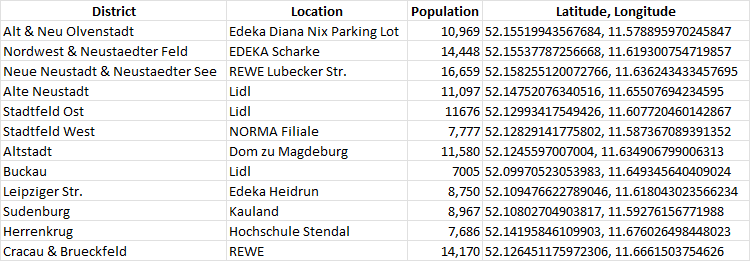

*Table 1.0 District, Location and Population Data for 12 central districts of Magdeburg*


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
input_data = [['Alt & Neu Olvenstadt', 52.15519943567684, 11.578895970245847],
['Nordwest & Neustaedter Feld', 52.15537787256668, 11.619300754719857],
['Neue Neustadt & Neustaedter See', 52.158255120072766, 11.636243433457695],
['Alte Neustadt', 52.14752076340516, 11.65507694234595],
['Stadtfeld Ost', 52.12993417549426, 11.607720460142867],
['Stadtfeld West', 52.12829141775802, 11.587367089391352],
['Altstadt', 52.1245597007004, 11.634906799006313],
['Buckau', 52.09970523053983, 11.649345640409024],
['Leipziger Str.', 52.109476622789046, 11.618043023566234],
['Sudenburg', 52.10802704903817, 11.59276156771988],
['Herrenkrug', 52.14195846109903, 11.676026498448023],
['Cracau & Brueckfeld', 52.126451175972306, 11.6661503754626],
]

population = [10969, 14448, 16659, 11097, 11676, 7777, 11580, 7005, 8750, 8967, 7686, 14170]

In [ ]:
# create dataframe from input data
df = pd.DataFrame(input_data, columns=['District', 'latitude', 'longitude'])

# ensure that longitude and latitude columns are numeric
df['longitude'] = pd.to_numeric(df['longitude'])
df['latitude'] = pd.to_numeric(df['latitude'])

# print dataframe
print(df)

# illustrate input data via Plotly Express
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='District',
                        zoom=10, mapbox_style='open-street-map',
                        width=800, height=800)
fig.update_traces(marker={'size': 15})
fig.show()

                           District   latitude  longitude
0              Alt & Neu Olvenstadt  52.155199  11.578896
1       Nordwest & Neustaedter Feld  52.155378  11.619301
2   Neue Neustadt & Neustaedter See  52.158255  11.636243
3                     Alte Neustadt  52.147521  11.655077
4                     Stadtfeld Ost  52.129934  11.607720
5                    Stadtfeld West  52.128291  11.587367
6                          Altstadt  52.124560  11.634907
7                            Buckau  52.099705  11.649346
8                    Leipziger Str.  52.109477  11.618043
9                         Sudenburg  52.108027  11.592762
10                       Herrenkrug  52.141958  11.676026
11              Cracau & Brueckfeld  52.126451  11.666150


In [ ]:
# load the required modules
!pip install haversine  # to measure the distance between two locations considering the Earth's surface
!pip install pulp

import haversine
import pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 74.6 MB/s eta 0:00:00


Standard P-Median Formulation that we will use for the first part of the problem definition. The objective function is the product of the travel times are the population. It can be interpreted as the aggregated travel time of the population in a district. Our goal is to minimize this product given that we have P ambulances.

Assumptions:

* The travel times within a district are 3 minutes. Namely, $x_{ii} = 3\$ (The travel times of traversing from end to end of all districts was considered and averaged).
* The time taken from one district to another was calculated from Google maps and a minute extra was added to ensure that there is some grace time in case the ambulance goes to a location farther than the central point of the district.
* Only one ambulance can be placed at a district




$
\begin{align}
  \begin{array}{lll}
    &\textbf{Objective} & \\
    & \min \sum_{j=1,\dots,N} \sum_{j=1,\dots,N} d_{j} \cdot t_{ij} \cdot x_{ij} &~~~ (1) \\
    &&\\
    &\textbf{Constraints} & \\
    & \sum\limits_{j=1}^{N} x_{ij} = 1,~ \forall~ i = 1,\dots,N  &~~~ (2) \\
    & x_{ij} \le y_{j},~ \forall~ i,j = 1,\dots,N  &~~~ (3) \\
    & \sum\limits_{j=1}^{N} y_{j} \le P  &~~~ (4) \\
    & y_{j} \in \{0,1\},~ \forall~ j = 1,\dots,N  &~~~ (5) \\
    & x_{ij} \in \{0,1\},~ \forall~ i,j = 1,\dots,N  &~~~ (6) \\
  \end{array}
\end{align}
$

In [ ]:
#Adding population data to a dictionary
nodes = df.District
population_dict = {}
for i, j in zip(nodes, population):
  population_dict[i] = j

P = 5

tt = pd.read_excel('TravelTimes.xlsx')
tt.index = nodes
tt.columns = nodes
print(population_dict)

{'Alt & Neu Olvenstadt': 10969, 'Nordwest & Neustaedter Feld': 14448, 'Neue Neustadt & Neustaedter See': 16659, 'Alte Neustadt': 11097, 'Stadtfeld Ost': 11676, 'Stadtfeld West': 7777, 'Altstadt': 11580, 'Buckau': 7005, 'Leipziger Str.': 8750, 'Sudenburg': 8967, 'Herrenkrug': 7686, 'Cracau & Brueckfeld': 14170}


It is important to consider the distances that translate to reality. One way to tackle this approach is to consider the time taken for travelling by car as per Google maps. We can add a minute to the travel times to be more conservative.

Status: Optimal
Objective value: 1385228.0
For P =  1  --------------------
y [ Alt & Neu Olvenstadt ] =  0.0
y [ Nordwest & Neustaedter Feld ] =  0.0
y [ Neue Neustadt & Neustaedter See ] =  0.0
y [ Alte Neustadt ] =  1.0
y [ Stadtfeld Ost ] =  0.0
y [ Stadtfeld West ] =  0.0
y [ Altstadt ] =  0.0
y [ Buckau ] =  0.0
y [ Leipziger Str. ] =  0.0
y [ Sudenburg ] =  0.0
y [ Herrenkrug ] =  0.0
y [ Cracau & Brueckfeld ] =  0.0
Status: Optimal
Objective value: 1066798.0
For P =  2  --------------------
y [ Alt & Neu Olvenstadt ] =  0.0
y [ Nordwest & Neustaedter Feld ] =  0.0
y [ Neue Neustadt & Neustaedter See ] =  0.0
y [ Alte Neustadt ] =  1.0
y [ Stadtfeld Ost ] =  0.0
y [ Stadtfeld West ] =  1.0
y [ Altstadt ] =  0.0
y [ Buckau ] =  0.0
y [ Leipziger Str. ] =  0.0
y [ Sudenburg ] =  0.0
y [ Herrenkrug ] =  0.0
y [ Cracau & Brueckfeld ] =  0.0
Status: Optimal
Objective value: 889875.0
For P =  3  --------------------
y [ Alt & Neu Olvenstadt ] =  0.0
y [ Nordwest & Neustaedter Feld ] =

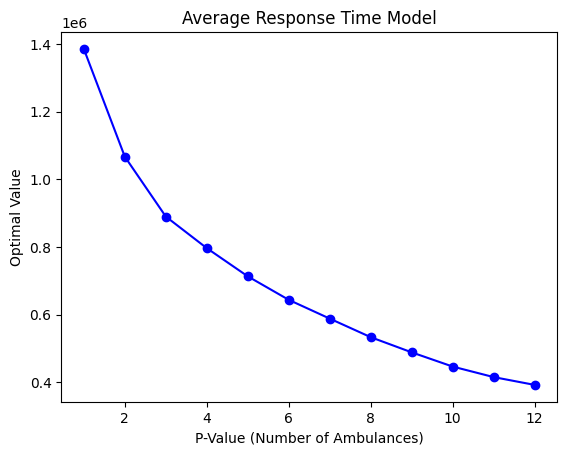

In [ ]:
optimal = []
p_value = []
optimal_locations = {}
for k in range(1,13):
  P = k
  # build problem
  model = pulp.LpProblem(name='P-Median', sense=pulp.constants.LpMinimize)

  # initialize sets
  nodes = df.District


  # decision variables
  x = pulp.LpVariable.dicts(name='x', indices=(nodes, nodes),
                            lowBound=0, upBound=1, cat='Binary')
  y = pulp.LpVariable.dicts(name='y', indices=nodes,
                            lowBound=0, upBound=1, cat='Binary')



  # Objective (1)
  # tt[i][j]
  model += pulp.lpSum(tt[i][j] * x[i][j] * population_dict[i] for i in nodes for j in nodes), "(1):Objective"

  # Constraints (2)
  for i in nodes:
    model += pulp.lpSum(x[i][j] for j in nodes) == 1, '(2):' + i

  # Constraints (3)
  for i in nodes:
    for j in nodes:
        model += x[i][j] <= y[j], '(3):' + i + '>' + j
        if i == j:
          model += x[i][j] == y[j], '(3*):' + i + '>' + j

  # Constraints (4)
  model += pulp.lpSum(y[j] for j in nodes) <= P, '(4):'
  # solve problem
  model.solve()

  # get status
  print("Status:", pulp.LpStatus[model.status])

  # get objective value
  print('Objective value:', round(pulp.value(model.objective), 2))

  # #print model variable
  # for v in model.variables():
  #     print(v.name,"=", v.varValue)

  # for i in nodes:
  #   for j in nodes:
  #     print('x[', i, '][', j, '] = ', x[i][j].varValue)

  print('For P = ', k,' --------------------')
  temp = []
  for j in nodes:
    print('y [', j,  '] = ', y[j].varValue)
    if y[j].varValue == 1:
      temp.append(j)
      optimal_locations[k] = temp

  optimal.append(round(pulp.value(model.objective), 2))
  p_value.append(k)

plt.plot(p_value, optimal, 'bo-')
plt.title('Average Response Time Model')
plt.xlabel('P-Value (Number of Ambulances)')
plt.ylabel('Optimal Value')
print(optimal)
print(optimal_locations)

#P-Median results

The optimal value decreases with a decreasing rate as the number of ambulances increase. The potential locations are plotted below:

In [ ]:
for P in range(1,13):
  black_col = {}
  print('Optimal location in Black for P Value = ', P)
  for reg in optimal_locations[P]:
    black_col[reg] = '#000000'

  fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='District',
                          zoom=10, mapbox_style='open-street-map', color_discrete_map = black_col,
                          width=800, height=800)
  fig.update_traces(marker={'size': 15})
  fig.show()




Optimal location in Black for P Value =  1


Optimal location in Black for P Value =  2


Optimal location in Black for P Value =  3


Optimal location in Black for P Value =  4


Optimal location in Black for P Value =  5


Optimal location in Black for P Value =  6


Optimal location in Black for P Value =  7


Optimal location in Black for P Value =  8


Optimal location in Black for P Value =  9


Optimal location in Black for P Value =  10


Optimal location in Black for P Value =  11


Optimal location in Black for P Value =  12


Standard P-Center Formulation that we will use for the second part of the problem definition. P-Center and the P-Median formulations are appropraite for comparison. The aim of the P-Center formulation is to minimize the maximum distance from an abulance location to another district.

$
\begin{align}
  \begin{array}{lll}
    &\textbf{Objective} & \\
    & \min z &~~~ (1) \\
    &&\\
    &\textbf{Constraints} & \\
    & \sum\limits_{j=1}^{N} t_{ij} \cdot x_{ij} \le z  ~ \forall~ i = 1,\dots,N &~~~ (2) \\
    & \sum\limits_{j=1}^{N} x_{ij} = 1,~ \forall~ i = 1,\dots,N  &~~~ (3) \\
    & x_{ij} \le y_{j},~ \forall~ i,j = 1,\dots,N  &~~~ (4) \\
    & \sum\limits_{j=1}^{N} y_{j} \le P  &~~~ (5) \\
    & y_{j} \in \{0,1\},~ \forall~ j = 1,\dots,N  &~~~ (6) \\
    & x_{ij} \in \{0,1\},~ \forall~ i,j = 1,\dots,N  &~~~ (7) \\
  \end{array}
\end{align}
$

Status: Optimal
Objective value: 15.0
For P =  1  --------------------
y [ Alt & Neu Olvenstadt ] =  0.0
y [ Nordwest & Neustaedter Feld ] =  0.0
y [ Neue Neustadt & Neustaedter See ] =  0.0
y [ Alte Neustadt ] =  0.0
y [ Stadtfeld Ost ] =  1.0
y [ Stadtfeld West ] =  0.0
y [ Altstadt ] =  0.0
y [ Buckau ] =  0.0
y [ Leipziger Str. ] =  0.0
y [ Sudenburg ] =  0.0
y [ Herrenkrug ] =  0.0
y [ Cracau & Brueckfeld ] =  0.0
Status: Optimal
Objective value: 12.0
For P =  2  --------------------
y [ Alt & Neu Olvenstadt ] =  1.0
y [ Nordwest & Neustaedter Feld ] =  0.0
y [ Neue Neustadt & Neustaedter See ] =  0.0
y [ Alte Neustadt ] =  0.0
y [ Stadtfeld Ost ] =  0.0
y [ Stadtfeld West ] =  0.0
y [ Altstadt ] =  1.0
y [ Buckau ] =  0.0
y [ Leipziger Str. ] =  0.0
y [ Sudenburg ] =  0.0
y [ Herrenkrug ] =  0.0
y [ Cracau & Brueckfeld ] =  0.0
Status: Optimal
Objective value: 9.0
For P =  3  --------------------
y [ Alt & Neu Olvenstadt ] =  1.0
y [ Nordwest & Neustaedter Feld ] =  0.0
y [ Neue 

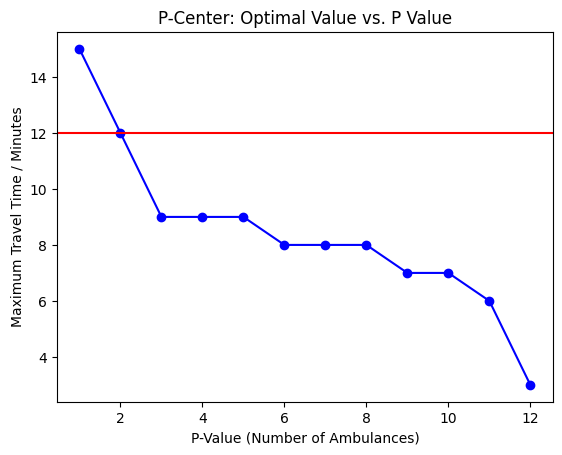

In [ ]:
max_dist = []
optimal_locations1 = {}
for k in range(1,13):
  model = pulp.LpProblem(name='P-Center', sense=pulp.constants.LpMinimize)
  P = k
  # initialize sets
  nodes = df.District


  # decision variables
  x = pulp.LpVariable.dicts(name='x', indices=(nodes, nodes),
                            lowBound=0, upBound=1, cat='Binary')
  y = pulp.LpVariable.dicts(name='y', indices=nodes,
                            lowBound=0, upBound=1, cat='Binary')

  z = pulp.LpVariable('z',lowBound = 0, cat='Continuous')
  # Objective (1)
  model += z, "(1):Objective"

  for i in nodes:
    model +=pulp.lpSum(tt[i][j] * x[i][j] for j in nodes) <= z, '(2):' + i
  # Constraints (2)
  for i in nodes:
    model += pulp.lpSum(x[i][j] for j in nodes) == 1, '(3):' + i

  # Constraints (3)
  for i in nodes:
    for j in nodes:
        model += x[i][j] <= y[j], '(4):' + i + '>' + j
        if i == j:
          model += x[i][j] == y[j], '(4*):' + i + '>' + j

  # Constraints (4)
  model += pulp.lpSum(y[j] for j in nodes) <= P, '(4):'
  # solve problem
  model.solve()

  # get status
  print("Status:", pulp.LpStatus[model.status])

  # get objective value
  print('Objective value:', pulp.value(model.objective))

  #print model variable
  # for v in model.variables():
  #     print(v.name,"=", v.varValue)

  # for i in nodes:
  #   for j in nodes:
  #     print('x[', i, '][', j, '] = ', x[i][j].varValue)

  print('For P = ', k,' --------------------')
  temp = []
  for j in nodes:
    print('y [', j,  '] = ', y[j].varValue)
    if y[j].varValue == 1:
      temp.append(j)

      optimal_locations1[k] = temp

  max_dist.append(pulp.value(model.objective))


plt.plot(p_value, max_dist, 'bo-')
plt.title('P-Center: Optimal Value vs. P Value')
plt.xlabel('P-Value (Number of Ambulances)')
plt.ylabel('Maximum Travel Time / Minutes')
plt.axhline(y=12, color='r', linestyle='-')


#P-Center Results

The optimal locations for the P-Center formulation are reported in the maps below.

In [ ]:
for P in range(1,13):
  black_col = {}
  print('P-Center: Optimal location in Black for P Value = ', P, ', and Maximum Distance = ', max_dist[P-1])
  for reg in optimal_locations1[P]:
    black_col[reg] = '#000000'

  fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='District',
                          zoom=10, mapbox_style='open-street-map', color_discrete_map = black_col,
                          width=800, height=800)
  fig.update_traces(marker={'size': 15})
  fig.show()

P-Center: Optimal location in Black for P Value =  1 , and Maximum Distance =  15.0


P-Center: Optimal location in Black for P Value =  2 , and Maximum Distance =  12.0


P-Center: Optimal location in Black for P Value =  3 , and Maximum Distance =  9.0


P-Center: Optimal location in Black for P Value =  4 , and Maximum Distance =  9.0


P-Center: Optimal location in Black for P Value =  5 , and Maximum Distance =  9.0


P-Center: Optimal location in Black for P Value =  6 , and Maximum Distance =  8.0


P-Center: Optimal location in Black for P Value =  7 , and Maximum Distance =  8.0


P-Center: Optimal location in Black for P Value =  8 , and Maximum Distance =  8.0


P-Center: Optimal location in Black for P Value =  9 , and Maximum Distance =  7.0


P-Center: Optimal location in Black for P Value =  10 , and Maximum Distance =  7.0


P-Center: Optimal location in Black for P Value =  11 , and Maximum Distance =  6.0


P-Center: Optimal location in Black for P Value =  12 , and Maximum Distance =  3.0


#Double Standard Model

We decided to implement a double standard model with the restriction of the number of ambulances allowed at each district. We have decided to alot a maximum of 2 ambulances per district.

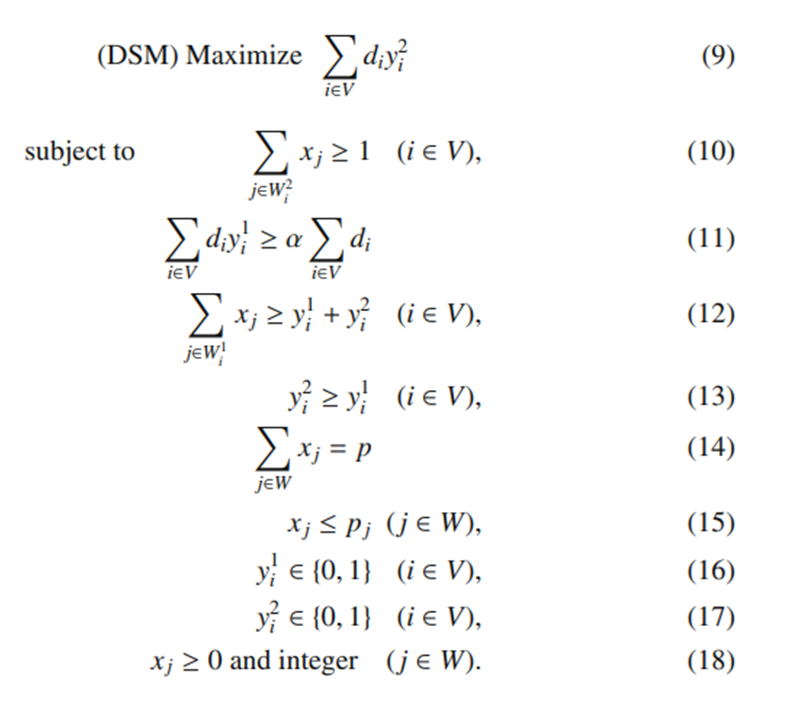


----------
Alpha:  0.5  Ambulances:  4
Status: Infeasible
Objective value: 87757.0
x_Alt_&_Neu_Olvenstadt = 0.0
x_Alte_Neustadt = 2.0
x_Altstadt = 0.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 1.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = 1.0
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 0.0
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 0.3336
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.0
y1_Stadtfeld_Ost = 0.0
y1_Stadtfeld_West = 0.0
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 0.0
y2_Alte_Neustadt = 1.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.6664
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 0.0
y2_Stadtfeld_Ost = 1.0
y2_Stadtfeld_West = 1.0
y2_Sudenburg = 1.0
----------


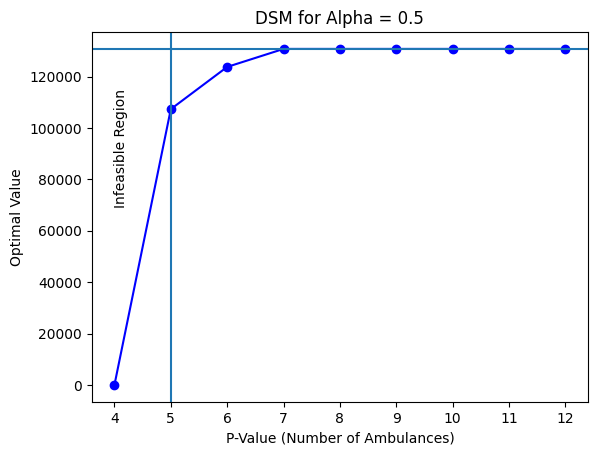

----------
Alpha:  0.6  Ambulances:  4
Status: Infeasible
Objective value: 65044.23427537001
x_Alt_&_Neu_Olvenstadt = 1.2098915
x_Alte_Neustadt = 2.0
x_Altstadt = -1.2098915
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 2.2098915
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = -0.20989151
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 0.60494576
y1_Alte_Neustadt = 1.0
y1_Altstadt = 0.39505424
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 1.1049458
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.60494576
y1_Stadtfeld_Ost = -0.10494576
y1_Stadtfeld_West = -0.10494576
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 0.60494576
y2_Alte_Neustadt = -0.20989151
y2_Altstadt = 0.39505424
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 1.1049458
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_

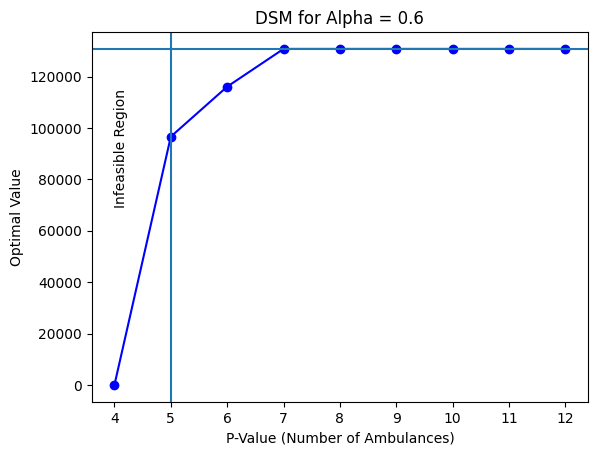

----------
Alpha:  0.7  Ambulances:  4
Status: Infeasible
Objective value: 55377.028349315995
x_Alt_&_Neu_Olvenstadt = 1.0979592
x_Alte_Neustadt = 2.0
x_Altstadt = 0.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 1.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = -1.0979592
x_Sudenburg = 1.0
y1_Alt_&_Neu_Olvenstadt = 0.54897959
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 1.0
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.54897959
y1_Stadtfeld_Ost = 1.0
y1_Stadtfeld_West = -0.048979592
y1_Sudenburg = 0.45102041
y2_Alt_&_Neu_Olvenstadt = 0.54897959
y2_Alte_Neustadt = 1.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 1.0
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 0.54897959
y2_Stadtfeld_Os

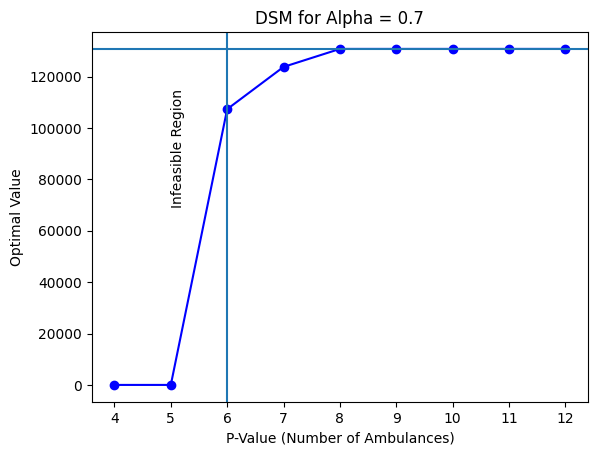

----------
Alpha:  0.8  Ambulances:  4
Status: Infeasible
Objective value: -48890.816682900004
x_Alt_&_Neu_Olvenstadt = -12.148169
x_Alte_Neustadt = -10.148169
x_Altstadt = 1.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 0.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 12.148169
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = 13.148169
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 0.0
y1_Alte_Neustadt = -4.5740843
y1_Altstadt = -4.5740843
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = -5.0740843
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 0.0
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.0
y1_Stadtfeld_Ost = 13.148169
y1_Stadtfeld_West = 6.5740843
y1_Sudenburg = 6.5740843
y2_Alt_&_Neu_Olvenstadt = 0.0
y2_Alte_Neustadt = -4.5740843
y2_Altstadt = -4.5740843
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = -5.0740843
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.0
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaed

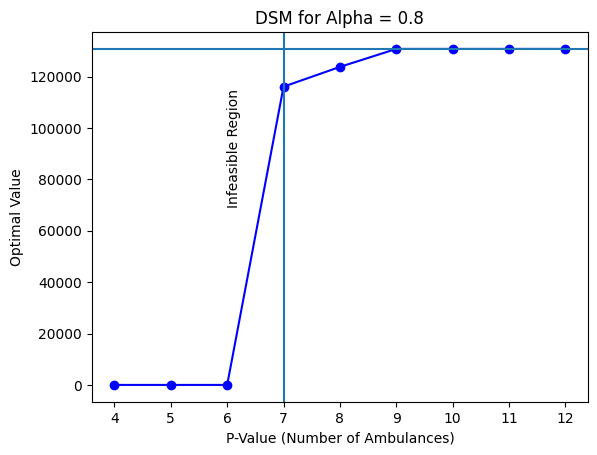

----------
Alpha:  0.9  Ambulances:  4
Status: Infeasible
Objective value: -45799.95402979999
x_Alt_&_Neu_Olvenstadt = 0.0
x_Alte_Neustadt = 7.7343252
x_Altstadt = -5.7343252
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 6.7343252
x_Herrenkrug = 0.0
x_Leipziger_Str. = 6.7343252
x_Neue_Neustadt_&_Neustaedter_See = -6.7343252
x_Nordwest_&_Neustaedter_Feld = 1.0
x_Stadtfeld_Ost = 2.0
x_Stadtfeld_West = -1.0
x_Sudenburg = -6.7343252
y1_Alt_&_Neu_Olvenstadt = 0.5
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 6.7343252
y1_Leipziger_Str. = 0.0
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 1.0
y1_Stadtfeld_Ost = 0.5
y1_Stadtfeld_West = -2.8671626
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 0.5
y2_Alte_Neustadt = 1.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.0
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = -6.7343252
y2_Stadtfeld

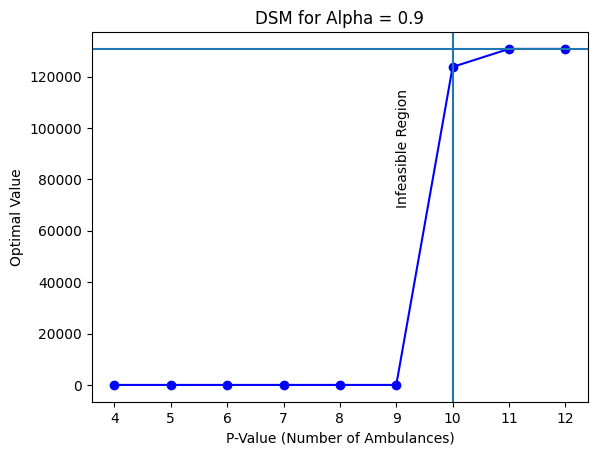

----------
Alpha:  0.95  Ambulances:  4
Status: Infeasible
Objective value: 60795.0
x_Alt_&_Neu_Olvenstadt = 0.0
x_Alte_Neustadt = -1.0
x_Altstadt = 3.0
x_Buckau = -5.5394562
x_Cracau_&_Brueckfeld = 2.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 3.5394562
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 2.0
x_Stadtfeld_Ost = 1.5394562
x_Stadtfeld_West = 2.0
x_Sudenburg = -3.5394562
y1_Alt_&_Neu_Olvenstadt = 1.0
y1_Alte_Neustadt = 2.0
y1_Altstadt = 1.0
y1_Buckau = -5.5394562
y1_Cracau_&_Brueckfeld = 0.5
y1_Herrenkrug = 2.0
y1_Leipziger_Str. = 0.0
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 2.0
y1_Stadtfeld_Ost = 3.5394562
y1_Stadtfeld_West = 0.0
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 1.0
y2_Alte_Neustadt = 2.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 0.5
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.0
y2_Neue_Neustadt_&_Neustaedter_See = 0.0
y2_Nordwest_&_Neustaedter_Feld = 0.0
y2_Stadtfeld_Ost = 0.0
y2_Stadtfeld_West =

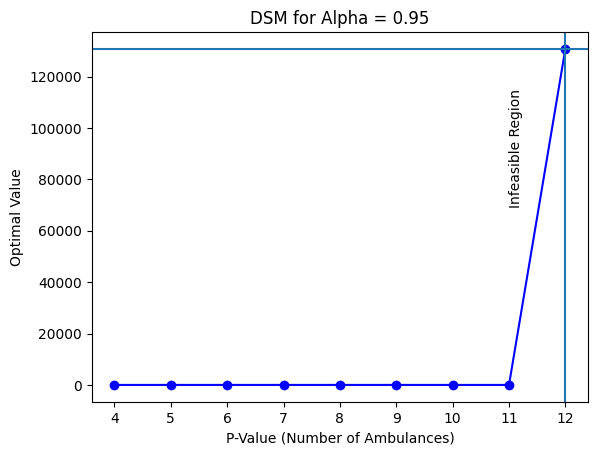

----------
Alpha:  1.0  Ambulances:  4
Status: Infeasible
Objective value: 76574.5
x_Alt_&_Neu_Olvenstadt = 0.0
x_Alte_Neustadt = 2.0
x_Altstadt = 0.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 1.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = 1.0
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 0.0
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 0.5
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.0
y1_Stadtfeld_Ost = 0.5
y1_Stadtfeld_West = 0.5
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 0.0
y2_Alte_Neustadt = 1.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.5
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 0.0
y2_Stadtfeld_Ost = 0.5
y2_Stadtfeld_West = 0.5
y2_Sudenburg = 1.0
----------
Alpha:

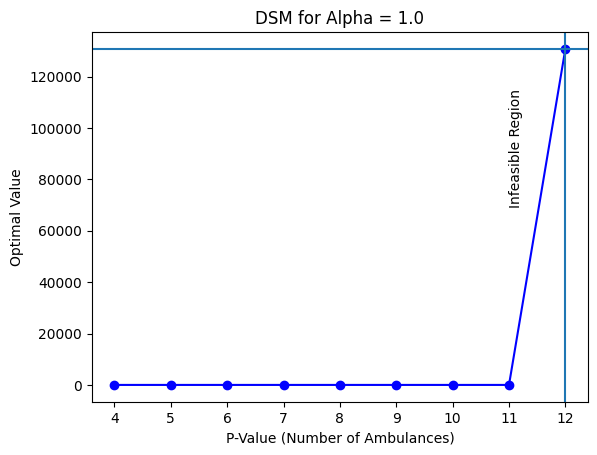

In [ ]:
model = pulp.LpProblem(name='DSM', sense=pulp.constants.LpMaximize)
alpha = [0.5,0.6,0.7,0.8,0.9,0.95,1.0]
P = list(range(4,13))


# initialize sets
nodes = df.District
aij = pd.read_excel('aij.xlsx')
aij.index = nodes
aij.columns = nodes

a1ij = pd.read_excel('a1ij.xlsx')
a1ij.index = nodes
a1ij.columns = nodes


for a in alpha:
  y_axis = []
  feasable = 0
  for p in P:
    model = pulp.LpProblem(name='DSM', sense=pulp.constants.LpMaximize)
    print('----------')

    print('Alpha: ',a,' Ambulances: ', p)
    # decision variables
    x = pulp.LpVariable.dicts(name='x', indices=nodes,
                              lowBound=0, cat='Integer')
    y1 = pulp.LpVariable.dicts(name='y1', indices=nodes,
                              lowBound=0, upBound=1, cat='Binary')
    y2= pulp.LpVariable.dicts(name='y2', indices=nodes,
                              lowBound=0, upBound=1, cat='Binary')

    # Objective (1)
    model += pulp.lpSum(y2[i] * population_dict[i] for i in nodes), '(1):Objective'
    #constraint (1)
    for i in nodes:
      model += pulp.lpSum(aij[i][j] * x[j]  for j in nodes) >= 1, '(2):constraint' + i
    # Constraints (2)
    model += pulp.lpSum(y1[i] * population_dict[i] for i in nodes) >= a*pulp.lpSum(population_dict[i] for i in nodes), '(3):constraint'
    # Constraints (3)
    for i in nodes:
      model += pulp.lpSum(a1ij[i][j] * x[j] for j in nodes)>= y1[i]+y2[i], '(4):constraint'  + i
    # constriant (4)
    for i in nodes:
      model += y2[i]>= y1[i], '(5):constraint' +i

    # Constraints (5)
    model += pulp.lpSum(x[j] for j in nodes) == p, '(6):constriant'

    #constraint (6)
    for j in nodes:
      model += x[j] <= 2, '(7):constraint' + j
    # solve problem
    model.solve()

    # get status
    print("Status:", pulp.LpStatus[model.status])

    if pulp.LpStatus[model.status] == 'Infeasible':
      y_axis.append(0)
    else:
      y_axis.append(pulp.value(model.objective))

    if feasable == 0 and pulp.LpStatus[model.status] == 'Optimal':
      feasable = p

    # get objective value
    print('Objective value:', pulp.value(model.objective))
    for v in model.variables():
      print(v.name,"=", v.varValue)
  plt.plot(P, y_axis, 'bo-')
  plt.axvline(x = feasable)
  plt.axhline(sum(population))
  plt.title('DSM for Alpha = ' + str(a))
  plt.xlabel('P-Value (Number of Ambulances)')
  plt.ylabel('Optimal Value')
  plt.text(x = feasable - 1, y = 70000, s = 'Infeasible Region', rotation = 90)
  plt.show()
    #print model variable


##Population Augmentation

Following the supply chain disruptions due to the corona virus pandemic, international markets were reassured of the tangled global supply chains and the codependence of major economies. In order to prevent future disruptions, many corporations developed strategized to move raw materials closer to them. One such strategy implemented by Intel was to invest billions of dollars in Europe. Intel decided to construct its gigafactory in Magdeburg, which should be operational by 2027. The factory will be located in the south west of Magdeburg in Eulenberg.

The south western central districts are expected to grow in size larger than that of the other districts. These districts are Stadtfeld West, Stadtfeld Ost, Sudenburg and Leipziger Str.. Hence, the populations of these districts will be incremented by 20% and the assignment decisions of the model will be assesed.

In [ ]:
population_dict1 = population_dict
population_dict1['Stadtfeld West'] = round(population_dict['Stadtfeld West'] * 1.2)
population_dict1['Stadtfeld Ost'] = round(population_dict['Stadtfeld Ost']*1.2)
population_dict1['Sudenburg'] = round(population_dict['Sudenburg']*1.2)
population_dict1['Leipziger Str.'] = round(population_dict['Leipziger Str.']*1.2)

print(population_dict1)

{'Alt & Neu Olvenstadt': 10969, 'Nordwest & Neustaedter Feld': 14448, 'Neue Neustadt & Neustaedter See': 16659, 'Alte Neustadt': 11097, 'Stadtfeld Ost': 14011, 'Stadtfeld West': 9332, 'Altstadt': 11580, 'Buckau': 7005, 'Leipziger Str.': 10500, 'Sudenburg': 10760, 'Herrenkrug': 7686, 'Cracau & Brueckfeld': 14170}


Status: Optimal
Objective value: 1480210.0
For P =  1  --------------------
y [ Alt & Neu Olvenstadt ] =  0.0
y [ Nordwest & Neustaedter Feld ] =  0.0
y [ Neue Neustadt & Neustaedter See ] =  0.0
y [ Alte Neustadt ] =  0.0
y [ Stadtfeld Ost ] =  1.0
y [ Stadtfeld West ] =  0.0
y [ Altstadt ] =  0.0
y [ Buckau ] =  0.0
y [ Leipziger Str. ] =  0.0
y [ Sudenburg ] =  0.0
y [ Herrenkrug ] =  0.0
y [ Cracau & Brueckfeld ] =  0.0
Status: Optimal
Objective value: 1117859.0
For P =  2  --------------------
y [ Alt & Neu Olvenstadt ] =  0.0
y [ Nordwest & Neustaedter Feld ] =  0.0
y [ Neue Neustadt & Neustaedter See ] =  0.0
y [ Alte Neustadt ] =  1.0
y [ Stadtfeld Ost ] =  0.0
y [ Stadtfeld West ] =  1.0
y [ Altstadt ] =  0.0
y [ Buckau ] =  0.0
y [ Leipziger Str. ] =  0.0
y [ Sudenburg ] =  0.0
y [ Herrenkrug ] =  0.0
y [ Cracau & Brueckfeld ] =  0.0
Status: Optimal
Objective value: 946034.0
For P =  3  --------------------
y [ Alt & Neu Olvenstadt ] =  0.0
y [ Nordwest & Neustaedter Feld ] =

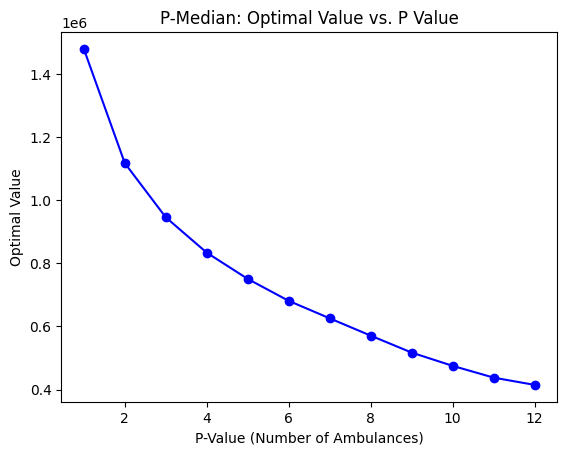

In [ ]:
optimal = []
p_value = []
optimal_locations = {}
for k in range(1,13):
  P = k
  # build problem
  model = pulp.LpProblem(name='P-Median', sense=pulp.constants.LpMinimize)

  # initialize sets
  nodes = df.District


  # decision variables
  x = pulp.LpVariable.dicts(name='x', indices=(nodes, nodes),
                            lowBound=0, upBound=1, cat='Binary')
  y = pulp.LpVariable.dicts(name='y', indices=nodes,
                            lowBound=0, upBound=1, cat='Binary')



  # Objective (1)
  # tt[i][j]
  model += pulp.lpSum(tt[i][j] * x[i][j] * population_dict1[i] for i in nodes for j in nodes), "(1):Objective"

  # Constraints (2)
  for i in nodes:
    model += pulp.lpSum(x[i][j] for j in nodes) == 1, '(2):' + i

  # Constraints (3)
  for i in nodes:
    for j in nodes:
        model += x[i][j] <= y[j], '(3):' + i + '>' + j
        if i == j:
          model += x[i][j] == y[j], '(3*):' + i + '>' + j

  # Constraints (4)
  model += pulp.lpSum(y[j] for j in nodes) <= P, '(4):'
  # solve problem
  model.solve()

  # get status
  print("Status:", pulp.LpStatus[model.status])

  # get objective value
  print('Objective value:', round(pulp.value(model.objective), 2))

  # #print model variable
  # for v in model.variables():
  #     print(v.name,"=", v.varValue)

  # for i in nodes:
  #   for j in nodes:
  #     print('x[', i, '][', j, '] = ', x[i][j].varValue)

  print('For P = ', k,' --------------------')
  temp = []
  for j in nodes:
    print('y [', j,  '] = ', y[j].varValue)
    if y[j].varValue == 1:
      temp.append(j)
      optimal_locations[k] = temp

  optimal.append(round(pulp.value(model.objective), 2))
  p_value.append(k)

plt.plot(p_value, optimal, 'bo-')
plt.title('P-Median: Optimal Value vs. P Value')
plt.xlabel('P-Value (Number of Ambulances)')
plt.ylabel('Optimal Value')
print(optimal)
print(optimal_locations)

In [ ]:
for P in range(1,13):
  black_col = {}
  print('Optimal location in Black for P Value = ', P)
  for reg in optimal_locations[P]:
    black_col[reg] = '#000000'

  fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='District',
                          zoom=10, mapbox_style='open-street-map', color_discrete_map = black_col,
                          width=800, height=800)
  fig.update_traces(marker={'size': 15})
  fig.show()

Optimal location in Black for P Value =  1


Optimal location in Black for P Value =  2


Optimal location in Black for P Value =  3


Optimal location in Black for P Value =  4


Optimal location in Black for P Value =  5


Optimal location in Black for P Value =  6


Optimal location in Black for P Value =  7


Optimal location in Black for P Value =  8


Optimal location in Black for P Value =  9


Optimal location in Black for P Value =  10


Optimal location in Black for P Value =  11


Optimal location in Black for P Value =  12


It is worth noting that the populaition data is not taken as an input to the P-Center Formulation. The population has no effect on the maximum distance from a district to an ambulance. The double standard model does take the population data as input. Hence, we can solve the DSM on the new augmented population data

----------
Alpha:  0.5  Ambulances:  4
Status: Infeasible
Objective value: 93266.49996
x_Alt_&_Neu_Olvenstadt = 0.0
x_Alte_Neustadt = 2.0
x_Altstadt = 0.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 1.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = 1.0
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 0.0
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 0.46119048
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.0
y1_Stadtfeld_Ost = 0.0
y1_Stadtfeld_West = 0.0
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 0.0
y2_Alte_Neustadt = 1.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.53880952
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 0.0
y2_Stadtfeld_Ost = 1.0
y2_Stadtfeld_West = 1.0
y2_Sudenburg = 1.0

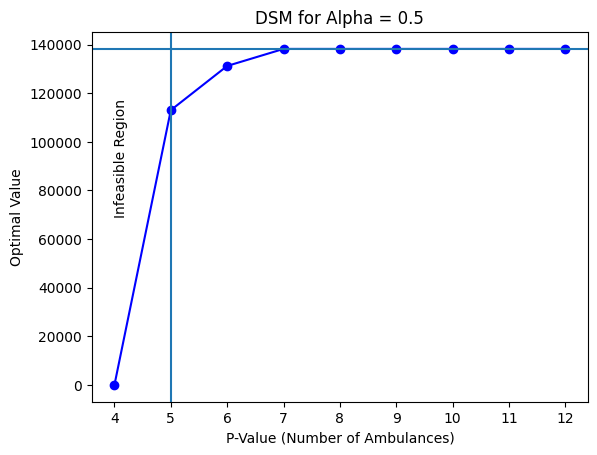

----------
Alpha:  0.6  Ambulances:  4
Status: Infeasible
Objective value: 64847.79695257999
x_Alt_&_Neu_Olvenstadt = 1.6805207
x_Alte_Neustadt = 2.0
x_Altstadt = 0.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 1.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = -0.68052073
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 0.84026037
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 0.5
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.84026037
y1_Stadtfeld_Ost = -0.34026037
y1_Stadtfeld_West = -0.34026037
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 0.84026037
y2_Alte_Neustadt = 1.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.5
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 0.84026037
y2_Stadtfeld_Os

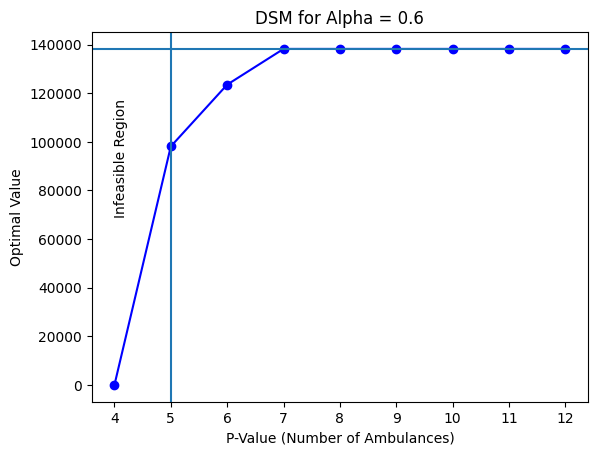

----------
Alpha:  0.7  Ambulances:  4
Status: Infeasible
Objective value: -193576.80883999998
x_Alt_&_Neu_Olvenstadt = 2.0
x_Alte_Neustadt = 2.0
x_Altstadt = 24.982222
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = -23.982222
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = -1.0
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 1.0
y1_Alte_Neustadt = 1.0
y1_Altstadt = 13.491111
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = -11.991111
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 1.0
y1_Stadtfeld_Ost = -0.5
y1_Stadtfeld_West = -0.5
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 1.0
y2_Alte_Neustadt = 1.0
y2_Altstadt = 13.491111
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = -11.991111
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 1.0
y2_Stadtfeld_Ost = -0.5
y2_St

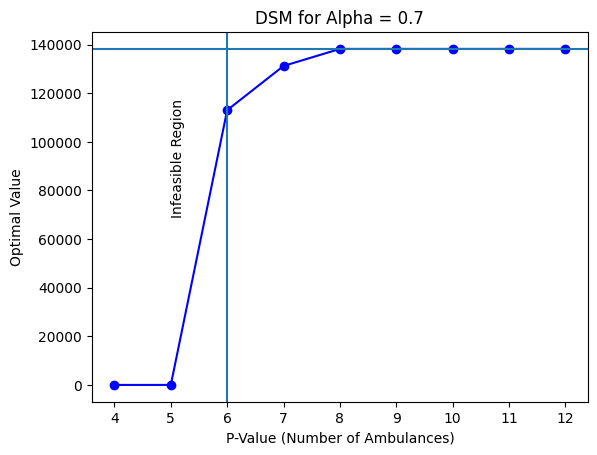

----------
Alpha:  0.8  Ambulances:  4
Status: Infeasible
Objective value: -164997.66838500003
x_Alt_&_Neu_Olvenstadt = 25.122733
x_Alte_Neustadt = 2.0
x_Altstadt = 1.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = 0.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 0.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = -24.122733
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 25.122733
y1_Alte_Neustadt = 1.5
y1_Altstadt = 1.5
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 0.0
y1_Leipziger_Str. = 0.0
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 12.561367
y1_Stadtfeld_Ost = -12.061367
y1_Stadtfeld_West = -12.061367
y1_Sudenburg = -12.061367
y2_Alt_&_Neu_Olvenstadt = 0.0
y2_Alte_Neustadt = 1.5
y2_Altstadt = 1.5
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 0.0
y2_Leipziger_Str. = 0.0
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 12.561367
y2_Stadtfeld_Ost = 

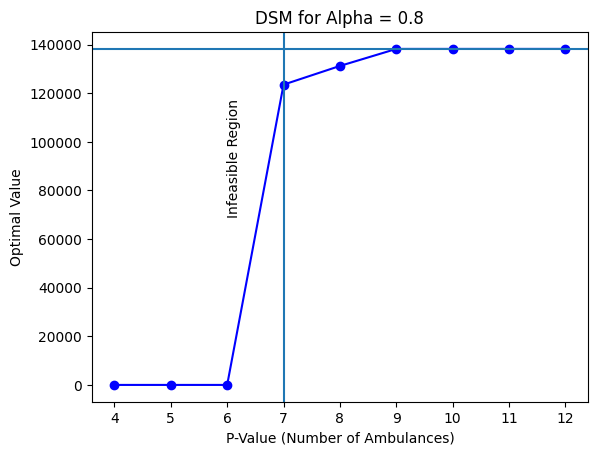

----------
Alpha:  0.9  Ambulances:  4
Status: Infeasible
Objective value: -32197.0001644
x_Alt_&_Neu_Olvenstadt = 6.0621948
x_Alte_Neustadt = 0.0
x_Altstadt = 2.0
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = -8.0621948
x_Herrenkrug = 0.0
x_Leipziger_Str. = -1.0
x_Neue_Neustadt_&_Neustaedter_See = 2.0
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = 1.0
x_Sudenburg = 2.0
y1_Alt_&_Neu_Olvenstadt = 3.0310974
y1_Alte_Neustadt = -2.0310974
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = -4.0310974
y1_Leipziger_Str. = 0.5
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 4.0310974
y1_Stadtfeld_Ost = 1.0
y1_Stadtfeld_West = 1.5
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = 3.0310974
y2_Alte_Neustadt = -2.0310974
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = -9.0621948
y2_Herrenkrug = -4.0310974
y2_Leipziger_Str. = 0.5
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nordwest_&_Neustaedter_Feld = 4.0310974
y2_

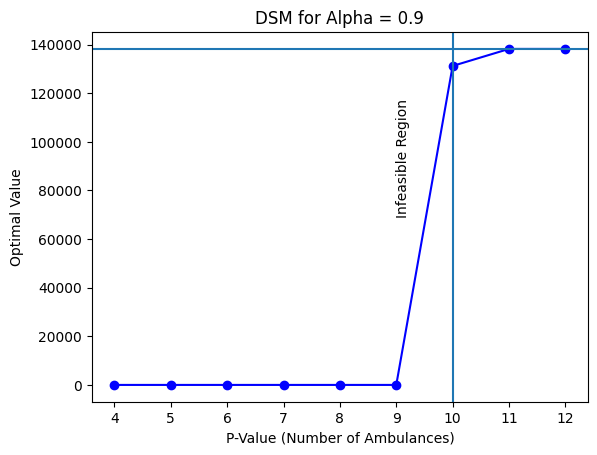

----------
Alpha:  0.95  Ambulances:  4
Status: Infeasible
Objective value: -404584.778424
x_Alt_&_Neu_Olvenstadt = -36.199952
x_Alte_Neustadt = -17.099976
x_Altstadt = 19.099976
x_Buckau = 0.0
x_Cracau_&_Brueckfeld = -36.199952
x_Herrenkrug = 0.0
x_Leipziger_Str. = -18.099976
x_Neue_Neustadt_&_Neustaedter_See = 36.199952
x_Nordwest_&_Neustaedter_Feld = 0.0
x_Stadtfeld_Ost = 36.199952
x_Stadtfeld_West = 1.0
x_Sudenburg = 19.099976
y1_Alt_&_Neu_Olvenstadt = -18.099976
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 0.0
y1_Cracau_&_Brueckfeld = -26.649964
y1_Herrenkrug = -18.099976
y1_Leipziger_Str. = 1.0
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 0.0
y1_Stadtfeld_Ost = 18.599976
y1_Stadtfeld_West = 56.299928
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = -18.099976
y2_Alte_Neustadt = 1.0
y2_Altstadt = 1.0
y2_Buckau = 0.0
y2_Cracau_&_Brueckfeld = -26.649964
y2_Herrenkrug = -18.099976
y2_Leipziger_Str. = 0.0
y2_Neue_Neustadt_&_Neustaedter_See = 1.0
y2_Nor

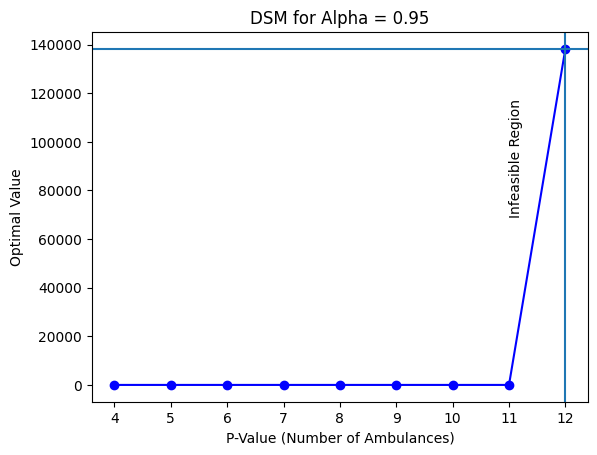

----------
Alpha:  1.0  Ambulances:  4
Status: Infeasible
Objective value: -123171.0
x_Alt_&_Neu_Olvenstadt = 0.0
x_Alte_Neustadt = 1.0
x_Altstadt = 0.0
x_Buckau = 2.0
x_Cracau_&_Brueckfeld = 2.0
x_Herrenkrug = 0.0
x_Leipziger_Str. = 2.0
x_Neue_Neustadt_&_Neustaedter_See = 0.0
x_Nordwest_&_Neustaedter_Feld = -4.0
x_Stadtfeld_Ost = 0.0
x_Stadtfeld_West = 1.0
x_Sudenburg = 0.0
y1_Alt_&_Neu_Olvenstadt = 1.0
y1_Alte_Neustadt = 1.0
y1_Altstadt = 1.0
y1_Buckau = 1.0
y1_Cracau_&_Brueckfeld = 1.0
y1_Herrenkrug = 1.0
y1_Leipziger_Str. = 1.0
y1_Neue_Neustadt_&_Neustaedter_See = 1.0
y1_Nordwest_&_Neustaedter_Feld = 1.0
y1_Stadtfeld_Ost = 1.0
y1_Stadtfeld_West = 1.0
y1_Sudenburg = 1.0
y2_Alt_&_Neu_Olvenstadt = -5.0
y2_Alte_Neustadt = 1.0
y2_Altstadt = 0.0
y2_Buckau = 1.0
y2_Cracau_&_Brueckfeld = 1.0
y2_Herrenkrug = 1.0
y2_Leipziger_Str. = 1.0
y2_Neue_Neustadt_&_Neustaedter_See = -4.0
y2_Nordwest_&_Neustaedter_Feld = -5.0
y2_Stadtfeld_Ost = 0.0
y2_Stadtfeld_West = 1.0
y2_Sudenburg = 1.0
----------


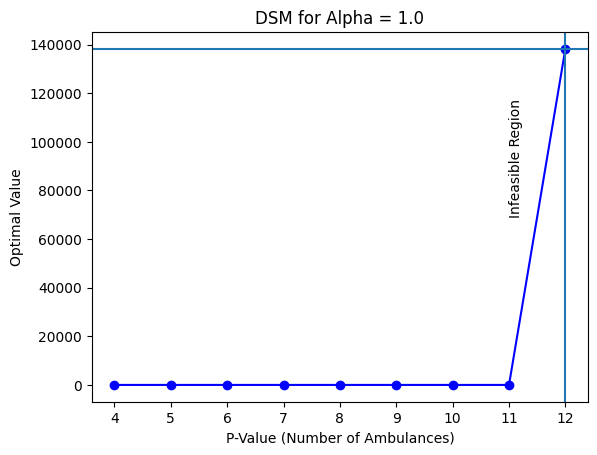

In [ ]:
pop_sum = 0

for i in population_dict:
  pop_sum += population_dict[i]

model = pulp.LpProblem(name='DSM', sense=pulp.constants.LpMaximize)
alpha = [0.5,0.6,0.7,0.8,0.9,0.95,1.0]
P = list(range(4,13))


# initialize sets
nodes = df.District
aij = pd.read_excel('aij.xlsx')
aij.index = nodes
aij.columns = nodes

a1ij = pd.read_excel('a1ij.xlsx')
a1ij.index = nodes
a1ij.columns = nodes


for a in alpha:
  y_axis = []
  feasable = 0
  for p in P:
    model = pulp.LpProblem(name='DSM', sense=pulp.constants.LpMaximize)
    print('----------')

    print('Alpha: ',a,' Ambulances: ', p)
    # decision variables
    x = pulp.LpVariable.dicts(name='x', indices=nodes,
                              lowBound=0, cat='Integer')
    y1 = pulp.LpVariable.dicts(name='y1', indices=nodes,
                              lowBound=0, upBound=1, cat='Binary')
    y2= pulp.LpVariable.dicts(name='y2', indices=nodes,
                              lowBound=0, upBound=1, cat='Binary')

    # Objective (1)
    model += pulp.lpSum(y2[i] * population_dict1[i] for i in nodes), '(1):Objective'
    #constraint (1)
    for i in nodes:
      model += pulp.lpSum(aij[i][j] * x[j]  for j in nodes) >= 1, '(2):constraint' + i
    # Constraints (2)
    model += pulp.lpSum(y1[i] * population_dict1[i] for i in nodes) >= a*pulp.lpSum(population_dict1[i] for i in nodes), '(3):constraint'
    # Constraints (3)
    for i in nodes:
      model += pulp.lpSum(a1ij[i][j] * x[j] for j in nodes)>= y1[i]+y2[i], '(4):constraint'  + i
    # constriant (4)
    for i in nodes:
      model += y2[i]>= y1[i], '(5):constraint' +i

    # Constraints (5)
    model += pulp.lpSum(x[j] for j in nodes) == p, '(6):constriant'

    #constraint (6)
    for j in nodes:
      model += x[j] <= 2, '(7):constraint' + j
    # solve problem
    model.solve()

    # get status
    print("Status:", pulp.LpStatus[model.status])

    if pulp.LpStatus[model.status] == 'Infeasible':
      y_axis.append(0)
    else:
      y_axis.append(pulp.value(model.objective))

    if feasable == 0 and pulp.LpStatus[model.status] == 'Optimal':
      feasable = p

    # get objective value
    print('Objective value:', pulp.value(model.objective))
    for v in model.variables():
      print(v.name,"=", v.varValue)
  plt.plot(P, y_axis, 'bo-')
  plt.axvline(x = feasable)
  plt.axhline(pop_sum)
  plt.title('DSM for Alpha = ' + str(a))
  plt.xlabel('P-Value (Number of Ambulances)')
  plt.ylabel('Optimal Value')
  plt.text(x = feasable - 1, y = 70000, s = 'Infeasible Region', rotation = 90)
  plt.show()
    #print model variable
